In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
int(df.duplicated().sum())

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [18]:
print(f"There are {len(numerical_cols)} Numerical Columns and they are {numerical_cols.tolist()}")
print(f"There are {len(categorical_cols)} Categorical Columns and they are {categorical_cols.tolist()}")

There are 3 Numerical Columns and they are ['math_score', 'reading_score', 'writing_score']
There are 5 Categorical Columns and they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
df['Total_Score']= df[numerical_cols].sum(axis=1)
df['Average_Score']= df[numerical_cols].mean(axis=1)

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
df['Total_Score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score']=df['Total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Text(0.5, 1.0, 'Distribution of Writing Scores')

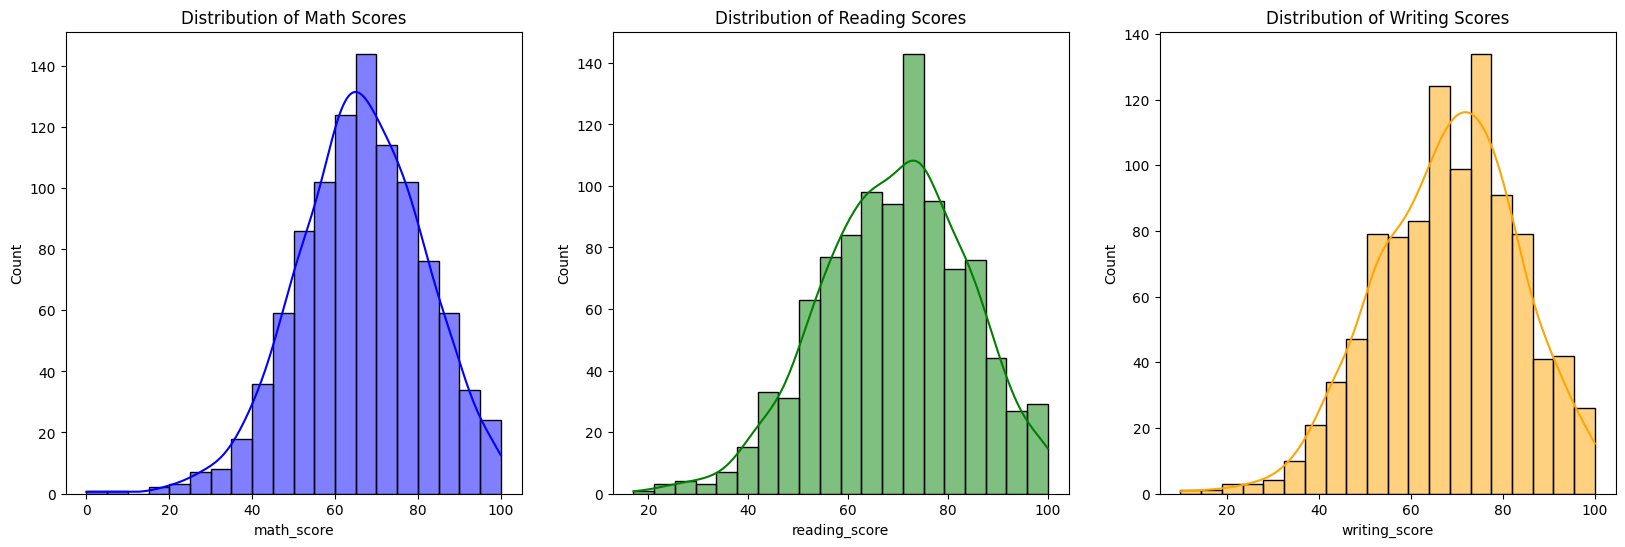

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 
sns.histplot(df['math_score'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Math Scores')    
sns.histplot(df['reading_score'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Reading Scores')
sns.histplot(df['writing_score'], bins=20, kde=True, ax=axes[2], color='orange')
axes[2].set_title('Distribution of Writing Scores')


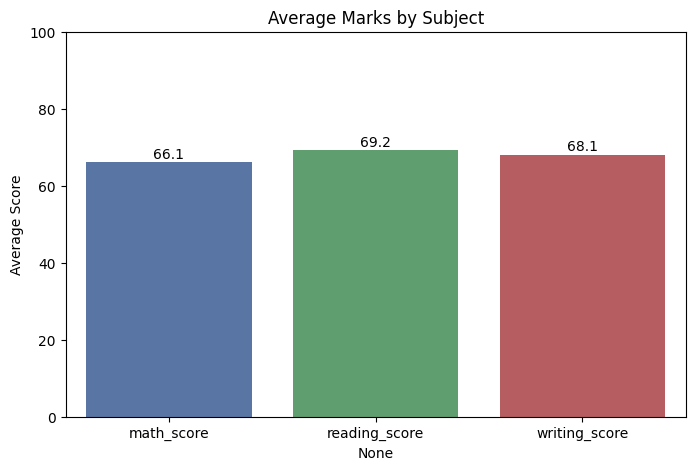

In [34]:
subject_cols = ['math_score', 'reading_score', 'writing_score']
subject_means = df[subject_cols].mean()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=subject_means.index, y=subject_means.values, palette=['#4c72b0','#55a868','#c44e52'])
plt.ylabel('Average Score')
plt.ylim(0, 100)
plt.title('Average Marks by Subject')

# annotate bars
for i, v in enumerate(subject_means.values):
    plt.text(i, v + 1, f"{v:.1f}", ha='center')

plt.show()

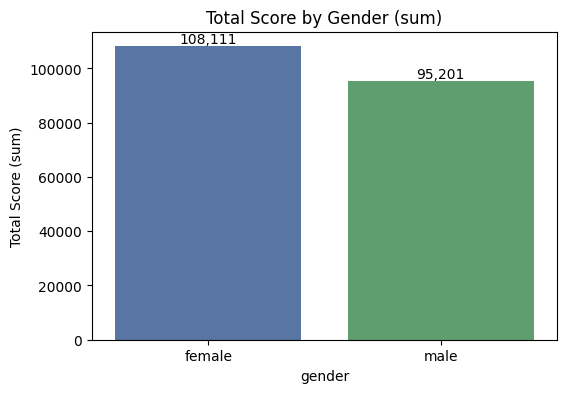

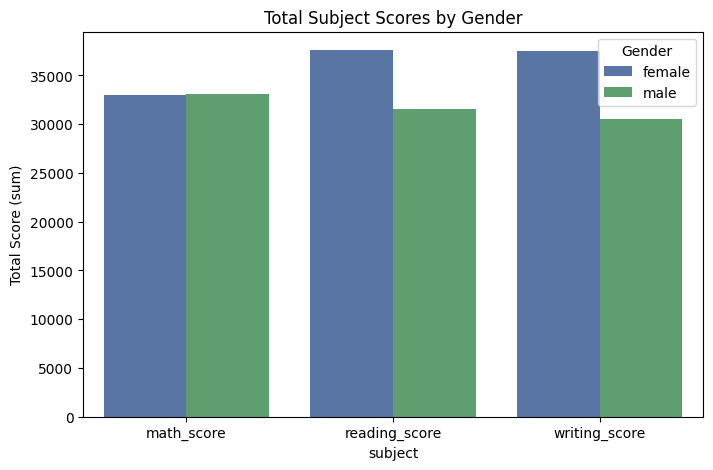

In [45]:

# ensure Total_Score exists
if 'Total_Score' not in df.columns:
    df['Total_Score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)

# overall total by gender (sum of Total_Score)
totals_by_gender = df.groupby('gender', dropna=False)['Total_Score'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='Total_Score', data=totals_by_gender, palette=['#4c72b0','#55a868'])
plt.ylabel('Total Score (sum)')
plt.title('Total Score by Gender (sum)')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom')
plt.show()

# per-subject total comparison by gender
subject_cols = ['math_score', 'reading_score', 'writing_score']
subject_totals = df.groupby('gender')[subject_cols].sum().reset_index().melt(id_vars='gender', var_name='subject', value_name='total_score')

plt.figure(figsize=(8,5))
sns.barplot(x='subject', y='total_score', hue='gender', data=subject_totals, palette=['#4c72b0','#55a868'])
plt.ylabel('Total Score (sum)')
plt.title('Total Subject Scores by Gender')
plt.legend(title='Gender')
plt.show()

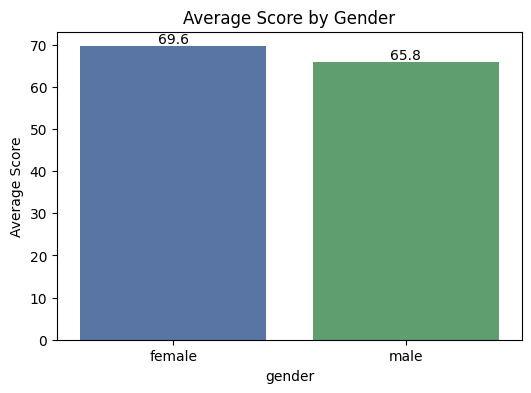

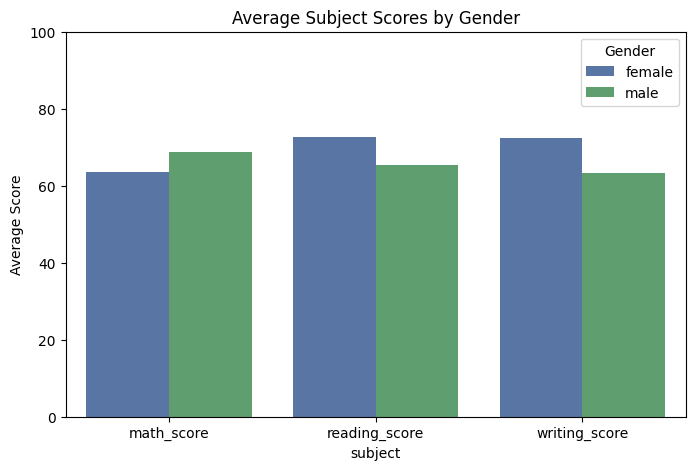

In [42]:


plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='Average_Score', data=df, estimator=np.mean, ci=None, palette=['#4c72b0','#55a868'])
plt.ylabel('Average Score')
plt.title('Average Score by Gender')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom')
plt.show()

# per-subject comparison by gender
subject_cols = ['math_score', 'reading_score', 'writing_score']
means = df.groupby('gender')[subject_cols].mean().reset_index().melt(id_vars='gender', var_name='subject', value_name='mean_score')

plt.figure(figsize=(8,5))
sns.barplot(x='subject', y='mean_score', hue='gender', data=means, palette=['#4c72b0','#55a868'])
plt.ylim(0, 100)
plt.ylabel('Average Score')
plt.title('Average Subject Scores by Gender')
plt.legend(title='Gender')
plt.show()